In [1]:
# Name: Ruidi Zhao
# Time: July 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
plt.style.use("ggplot")

# Read Data

In [2]:
# Block level census data
CBG_data = pd.read_csv("CBG_data.csv")
CBG_data.head()

,Label,"Block Group 1, Census Tract 5077.03, Santa Clara County, California!!Estimate","Block Group 2, Census Tract 5078.05, Santa Clara County, California!!Estimate","Block Group 1, Census Tract 5100.01, Santa Clara County, California!!Estimate","Block Group 2, Census Tract 5100.01, Santa Clara County, California!!Estimate","Block Group 3, Census Tract 5100.01, Santa Clara County, California!!Estimate","Block Group 4, Census Tract 5100.01, Santa Clara County, California!!Estimate","Block Group 5, Census Tract 5100.01, Santa Clara County, California!!Estimate","Block Group 6, Census Tract 5100.01, Santa Clara County, California!!Estimate","Block Group 1, Census Tract 5100.02, Santa Clara County, California!!Estimate",...,"Block Group 3, Census Tract 5102, Santa Clara County, California!!Estimate","Block Group 1, Census Tract 5103, Santa Clara County, California!!Estimate","Block Group 2, Census Tract 5103, Santa Clara County, California!!Estimate","Block Group 3, Census Tract 5103, Santa Clara County, California!!Estimate","Block Group 1, Census Tract 5104, Santa Clara County, California!!Estimate","Block Group 2, Census Tract 5104, Santa Clara County, California!!Estimate","Block Group 3, Census Tract 5104, Santa Clara County, California!!Estimate","Block Group 1, Census Tract 5105, Santa Clara County, California!!Estimate","Block Group 2, Census Tract 5105, Santa Clara County, California!!Estimate","Block Group 3, Census Tract 5105, Santa Clara County, California!!Estimate"
0,Total:,"1,197",991,742,"2,003","1,273",872,940,734,"1,435",...,"1,727","1,379","1,872",995,"2,005",563,"1,137","1,104","1,596","1,841"
1,Male:,494,496,335,868,650,470,402,358,595,...,854,709,879,505,"1,043",292,571,471,765,909
2,Under 5 years,14,72,0,0,47,28,29,0,17,...,57,65,34,0,51,21,32,8,8,58
3,5 to 9 years,14,20,29,0,93,13,0,21,36,...,52,65,54,56,50,20,65,50,82,61
4,10 to 14 years,85,70,17,12,75,100,41,0,94,...,70,88,82,72,50,18,56,69,41,77


In [3]:
# Precinct code >> CBG code
Mapping = pd.read_excel("Voting-Regular-CBG.xlsx", sheet_name="Mapping", usecols="A,C")
Mapping.dropna(inplace=True)
Mapping

,Voting Precinct,CBG approx
0,2301.0,"5105.1, 5105.2, 5105.3"
7,2305.0,"5103.1, 5103.2, 5104.1, 5104.2, 5104.3"
14,2309.0,"5102.3half, 5103.3"
19,2314.0,"5102.1, 5102.2, 5102.3half"
26,2317.0,"5100.02.1, 5100.02.2, 5100.02.3"
31,2330.0,"5100.01.1, 5100.01.2, 5100.01.3, 5100.01.4, 51..."
38,2338.0,5078.05.2ratio_1
40,2351.0,"5101.1, 5101.2, 5101.3"
47,2353.0,5077.03.1ratio_2


In [4]:
Voting_Anna = pd.read_excel("Voting_data.xlsx", sheet_name="Anna")
Voting_Rishi = pd.read_excel("Voting_data.xlsx", sheet_name="Rishi")

In [5]:
# Voting data for Anna
Voting_Anna

,County,Registered Voters,Election Day,Vote By Mail,Total Votes
0,2301,3636,51,1906,1957
1,2305,4846,103,2603,2706
2,2309,1231,11,665,676
3,2314,2828,49,1432,1481
4,2317,2707,69,1387,1456
5,2330,4245,57,2227,2284
6,2338,167,4,69,73
7,2351,2398,40,1242,1282
8,2353,43,2,12,14


In [6]:
# Voting data for Rishi
Voting_Rishi

,County,Election Day,Vote By Mail,Total Votes
0,2301,57,888,945
1,2305,74,1160,1234
2,2309,27,305,332
3,2314,49,802,851
4,2317,32,706,738
5,2330,53,1176,1229
6,2338,1,49,50
7,2351,33,665,698
8,2353,4,11,15


# Data Preprocessing

- Transform block level census data into precinct level census data
- Join census and voting data
- Clean data frame (column names, value format)

In [7]:
CBG_data = CBG_data.T.reset_index()
CBG_data.columns = CBG_data.loc[0]
CBG_data = CBG_data.drop(0).reset_index().drop('index',axis=1)
cols = list(CBG_data.columns)
CBG_data.columns = [i.strip().strip(':') for i in cols]
CBG_data.columns = ['Label', "Total", 'Male'] + ["Male " + i for i in CBG_data.columns[3:26]] + \
                            ["Female"] + ["Female " + i for i in CBG_data.columns[27:]]
CBG_data.head()

,Label,Total,Male,Male Under 5 years,Male 5 to 9 years,Male 10 to 14 years,Male 15 to 17 years,Male 18 and 19 years,Male 20 years,Male 21 years,...,Female 50 to 54 years,Female 55 to 59 years,Female 60 and 61 years,Female 62 to 64 years,Female 65 and 66 years,Female 67 to 69 years,Female 70 to 74 years,Female 75 to 79 years,Female 80 to 84 years,Female 85 years and over
0,"Block Group 1, Census Tract 5077.03, Santa Cla...","1,197",494,14,14,85,10,0,0,0,...,74,16,0,30,0,18,18,28,0,0
1,"Block Group 2, Census Tract 5078.05, Santa Cla...",991,496,72,20,70,0,0,0,0,...,0,75,22,0,0,0,0,34,23,30
2,"Block Group 1, Census Tract 5100.01, Santa Cla...",742,335,0,29,17,18,12,23,0,...,12,0,0,32,27,17,24,35,0,11
3,"Block Group 2, Census Tract 5100.01, Santa Cla...","2,003",868,0,0,12,72,0,0,20,...,58,95,113,41,51,23,69,61,0,25
4,"Block Group 3, Census Tract 5100.01, Santa Cla...","1,273",650,47,93,75,35,0,0,0,...,8,34,16,55,27,14,9,0,18,12


In [8]:
# Transform block level census data into precinct level data
df = [] 
for ind in list(Mapping.index): # Precinct 2353 requests special handling
    # Precinct Number
    precinct = Mapping.loc[ind, "Voting Precinct"]
    
    # Raw CBG number
    CBG = (Mapping.loc[ind, "CBG approx"]).split(', ')
    census = np.zeros(shape=(49,))
    
    # Find tract and block number, then aggregate the census data
    for group in CBG:
        multipler = 1
        if 'half' in group:
            multipler = 0.5
            group = group[:-4]
        elif 'ratio_2' in group:  # special handling for Precinct 2353
            multipler =  43/795 # total registered voters/total 18+ years old population
            group = group[:-7]
            #print(group)
        elif 'ratio_1' in group: # special handling for Precinct 2338
            multipler =  167/742
            group = group[:-7]
            
        if len(group) == 6:
            tract = group[:4]
            block = group[-1]
        else:
            tract = group[:7]
            block = group[-1]
        
        label = "Block Group {}, Census Tract {}, Santa Clara County, California!!Estimate".format(block, tract)
        this_block = CBG_data[CBG_data['Label'] == label]
        this_block_value = list(this_block.values[0, 1:])
        # print(this_block_value)
        if isinstance(this_block_value[0], str):
            this_block_value = np.array([float(i.replace(',', '')) for i in this_block_value]) * multipler
        else:
            this_block_value = np.array([float(i) for i in this_block_value]) * multipler
        #print(this_block_value)
        census += this_block_value
        
    to_add = [precinct, CBG] + list(census)
    df.append(to_add)
        
df = pd.DataFrame(df, columns=["Precinct", "CBG"] + list(CBG_data.columns)[1:])
df['Precinct'] = df['Precinct'].astype('int64')
df

,Precinct,CBG,Total,Male,Male Under 5 years,Male 5 to 9 years,Male 10 to 14 years,Male 15 to 17 years,Male 18 and 19 years,Male 20 years,...,Female 50 to 54 years,Female 55 to 59 years,Female 60 and 61 years,Female 62 to 64 years,Female 65 and 66 years,Female 67 to 69 years,Female 70 to 74 years,Female 75 to 79 years,Female 80 to 84 years,Female 85 years and over
0,2301,"[5105.1, 5105.2, 5105.3]",4541.000000,2145.000000,74.000000,193.000000,187.000000,98.000000,55.0,9.0,...,155.000000,197.000000,50.000000,61.000000,69.0,72.000000,160.000000,120.000000,99.00000,162.000000
1,2305,"[5103.1, 5103.2, 5104.1, 5104.2, 5104.3]",6956.000000,3494.000000,203.000000,254.000000,294.000000,201.000000,34.0,30.0,...,224.000000,244.000000,65.000000,139.000000,112.0,80.000000,99.000000,146.000000,93.00000,105.000000
2,2309,"[5102.3half, 5103.3]",1858.500000,932.000000,28.500000,82.000000,107.000000,79.500000,13.5,0.0,...,70.000000,53.500000,0.000000,35.500000,20.5,26.000000,100.000000,29.500000,23.50000,11.500000
3,2314,"[5102.1, 5102.2, 5102.3half]",3760.500000,1802.000000,90.500000,134.000000,149.000000,79.500000,16.5,52.0,...,125.000000,140.500000,38.000000,143.500000,35.5,67.000000,64.000000,73.500000,15.50000,24.500000
4,2317,"[5100.02.1, 5100.02.2, 5100.02.3]",3616.000000,1581.000000,47.000000,84.000000,144.000000,107.000000,6.0,0.0,...,177.000000,158.000000,47.000000,71.000000,41.0,39.000000,50.000000,73.000000,74.00000,50.000000
5,2330,"[5100.01.1, 5100.01.2, 5100.01.3, 5100.01.4, 5...",6564.000000,3083.000000,104.000000,156.000000,245.000000,183.000000,14.0,23.0,...,279.000000,317.000000,156.000000,200.000000,110.0,72.000000,193.000000,157.000000,44.00000,111.000000
6,2338,[5078.05.2ratio_1],223.041779,111.633423,16.204852,4.501348,15.754717,0.000000,0.0,0.0,...,0.000000,16.880054,4.951482,0.000000,0.0,0.000000,0.000000,7.652291,5.17655,6.752022
7,2351,"[5101.1, 5101.2, 5101.3]",2906.000000,1493.000000,90.000000,181.000000,133.000000,47.000000,16.0,14.0,...,114.000000,132.000000,35.000000,44.000000,17.0,52.000000,80.000000,86.000000,44.00000,62.000000
8,2353,[5077.03.1ratio_2],64.743396,26.719497,0.757233,0.757233,4.597484,0.540881,0.0,0.0,...,4.002516,0.865409,0.000000,1.622642,0.0,0.973585,0.973585,1.514465,0.00000,0.000000


In [9]:
# Join Voting and Census Data

In [10]:
Voting_Anna.columns = ['Precinct', 'Registered Voters'] + [i+"_Anna" for i in Voting_Anna.columns[2:]]
Voting_Anna

,Precinct,Registered Voters,Election Day_Anna,Vote By Mail_Anna,Total Votes_Anna
0,2301,3636,51,1906,1957
1,2305,4846,103,2603,2706
2,2309,1231,11,665,676
3,2314,2828,49,1432,1481
4,2317,2707,69,1387,1456
5,2330,4245,57,2227,2284
6,2338,167,4,69,73
7,2351,2398,40,1242,1282
8,2353,43,2,12,14


In [11]:
Voting_Rishi.columns = ['Precinct'] + [i+"_Rishi" for i in Voting_Rishi.columns[1:]]
Voting_Rishi

,Precinct,Election Day_Rishi,Vote By Mail_Rishi,Total Votes_Rishi
0,2301,57,888,945
1,2305,74,1160,1234
2,2309,27,305,332
3,2314,49,802,851
4,2317,32,706,738
5,2330,53,1176,1229
6,2338,1,49,50
7,2351,33,665,698
8,2353,4,11,15


In [12]:
df = (df.merge(Voting_Anna, on="Precinct")).merge(Voting_Rishi, on="Precinct")
df

,Precinct,CBG,Total,Male,Male Under 5 years,Male 5 to 9 years,Male 10 to 14 years,Male 15 to 17 years,Male 18 and 19 years,Male 20 years,...,Female 75 to 79 years,Female 80 to 84 years,Female 85 years and over,Registered Voters,Election Day_Anna,Vote By Mail_Anna,Total Votes_Anna,Election Day_Rishi,Vote By Mail_Rishi,Total Votes_Rishi
0,2301,"[5105.1, 5105.2, 5105.3]",4541.000000,2145.000000,74.000000,193.000000,187.000000,98.000000,55.0,9.0,...,120.000000,99.00000,162.000000,3636,51,1906,1957,57,888,945
1,2305,"[5103.1, 5103.2, 5104.1, 5104.2, 5104.3]",6956.000000,3494.000000,203.000000,254.000000,294.000000,201.000000,34.0,30.0,...,146.000000,93.00000,105.000000,4846,103,2603,2706,74,1160,1234
2,2309,"[5102.3half, 5103.3]",1858.500000,932.000000,28.500000,82.000000,107.000000,79.500000,13.5,0.0,...,29.500000,23.50000,11.500000,1231,11,665,676,27,305,332
3,2314,"[5102.1, 5102.2, 5102.3half]",3760.500000,1802.000000,90.500000,134.000000,149.000000,79.500000,16.5,52.0,...,73.500000,15.50000,24.500000,2828,49,1432,1481,49,802,851
4,2317,"[5100.02.1, 5100.02.2, 5100.02.3]",3616.000000,1581.000000,47.000000,84.000000,144.000000,107.000000,6.0,0.0,...,73.000000,74.00000,50.000000,2707,69,1387,1456,32,706,738
5,2330,"[5100.01.1, 5100.01.2, 5100.01.3, 5100.01.4, 5...",6564.000000,3083.000000,104.000000,156.000000,245.000000,183.000000,14.0,23.0,...,157.000000,44.00000,111.000000,4245,57,2227,2284,53,1176,1229
6,2338,[5078.05.2ratio_1],223.041779,111.633423,16.204852,4.501348,15.754717,0.000000,0.0,0.0,...,7.652291,5.17655,6.752022,167,4,69,73,1,49,50
7,2351,"[5101.1, 5101.2, 5101.3]",2906.000000,1493.000000,90.000000,181.000000,133.000000,47.000000,16.0,14.0,...,86.000000,44.00000,62.000000,2398,40,1242,1282,33,665,698
8,2353,[5077.03.1ratio_2],64.743396,26.719497,0.757233,0.757233,4.597484,0.540881,0.0,0.0,...,1.514465,0.00000,0.000000,43,2,12,14,4,11,15


# Exploratory Data Analysis

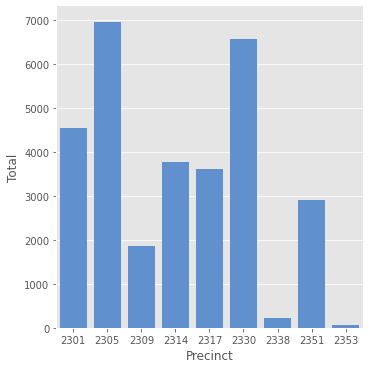

In [13]:
# Population by Precinct
sns.catplot(x="Precinct", y="Total", kind="bar", data=df, color="#4E8FE0");

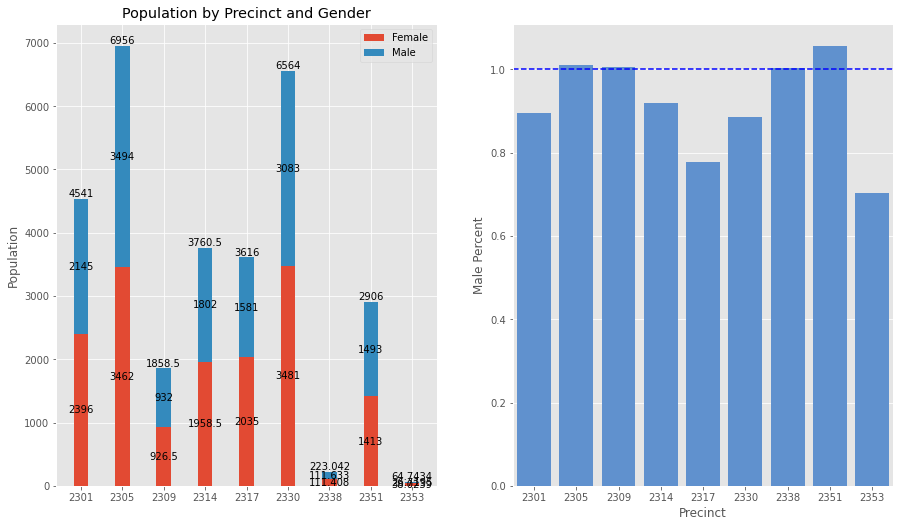

In [14]:
# Population by Precinct and Gender 
N = 9
men = df['Male']
women = df['Female']
labels = list(df['Precinct'])
ind = np.arange(N)    
width = 0.35 

fig, ax = plt.subplots(1, 2, figsize=(15,8.5))

p1 = ax[0].bar(ind, women, width, label='Female') 
p2 = ax[0].bar(ind, men, width, bottom=women, label='Male')

ax[0].set_ylabel('Population')
ax[0].set_title('Population by Precinct and Gender')
ax[0].set_xticks(ind)
ax[0].set_xticklabels(labels)
ax[0].legend()

# Label with label_type 'center' instead of the default 'edge'
ax[0].bar_label(p1, label_type='center')
ax[0].bar_label(p2, label_type='center')
ax[0].bar_label(p2)


df['Male Percent'] = df['Male']/df['Female']
p3 = sns.barplot(x="Precinct", y="Male Percent", data=df, ax=ax[1], color="#4E8FE0")
ax[1].axhline(1.0, ls='--', color="blue");

In [15]:
# Age 18+ Population by Precinct
cols = list(df.columns)
male_18_index = cols.index("Male 18 and 19 years")
female_index = cols.index("Female")
female_18_index = cols.index("Female 18 and 19 years")
female_end_index = cols.index("Female 85 years and over")

df['Male Above 18 years'] = (df[df.columns[male_18_index:female_index]]).sum(axis=1).values
df['Female Above 18 years'] = (df[df.columns[female_18_index:female_end_index+1]]).sum(axis=1).values
df['Above 18 years'] = df['Male Above 18 years'] + df['Female Above 18 years']
df['Male Above 18 years percent'] = df['Male Above 18 years']/df['Male']
df['Female Above 18 years percent'] = df['Female Above 18 years']/df['Female']
df['Above 18 years percent'] = df['Above 18 years']/df['Total']

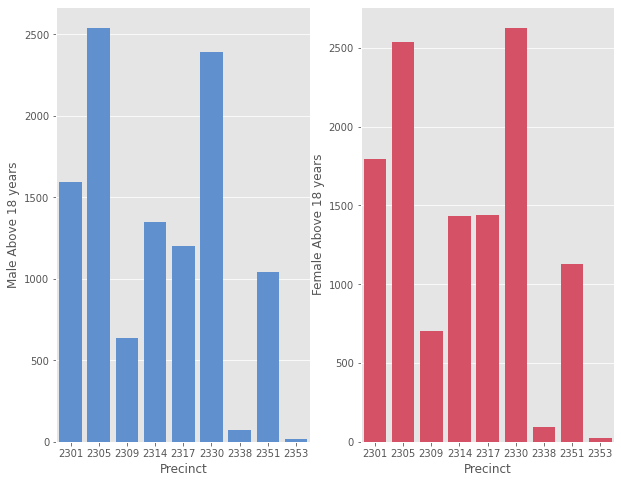

In [16]:
# Male, Female above 18 years by Precinct
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
sns.barplot(x="Precinct", y="Male Above 18 years", data=df, color="#4E8FE0", ax=ax[0]);
sns.barplot(x="Precinct", y="Female Above 18 years", data=df, color="#EB3B57", ax=ax[1]);

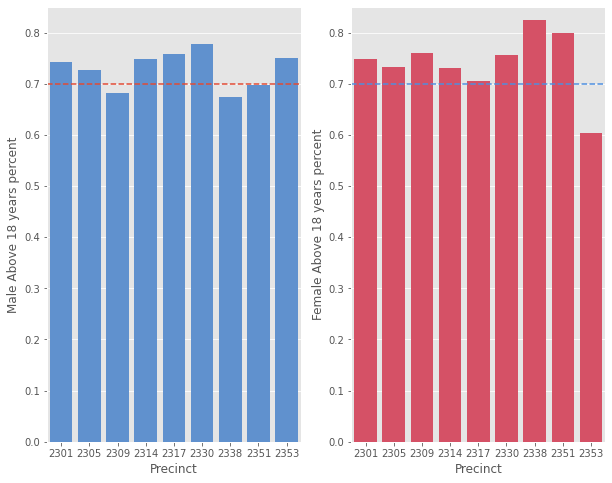

In [17]:
# Male, Female Precent above 18 years by Precinct
fig, ax = plt.subplots(1, 2, figsize=(10, 8))
sns.barplot(x="Precinct", y="Male Above 18 years percent", data=df, color="#4E8FE0", ax=ax[0]);
sns.barplot(x="Precinct", y="Female Above 18 years percent", data=df, color="#EB3B57", ax=ax[1]);

ax[0].axhline(0.7, ls='--')
ax[0].set(ylim=(0, 0.85))
ax[1].axhline(0.7, ls='--', color="#4E8FE0")
ax[1].set(ylim=(0, 0.85));

In [18]:
# Split age into groups, https://www.beresfordresearch.com/age-range-by-generation/
# Below 18 years
# 18 - 24
# 25 - 39
# 40 - 54
# 55 - 74
# 75 + 
age_split = {18:'18 and 19 years', 24:'22 to 24 years', 39:'35 to 39 years', 54:'50 to 54 years', 
                 74:"70 to 74 years", 85:"85 years and over"}
cols = list(df.columns)
for i in ['Male', 'Female']:
    split_1 = cols.index(i)
    split_2 = cols.index(i + " " + age_split[18])
    split_3 = cols.index(i + " " + age_split[24])
    split_4 = cols.index(i + " " + age_split[39])
    split_5 = cols.index(i + " " + age_split[54])
    split_6 = cols.index(i + " " + age_split[74])
    split_7 = cols.index(i + " " + age_split[85])
    
    df[i + " " + "Below 18 years"] = df[cols[split_1+1:split_2]].sum(axis=1).values
    df[i + " " + "18 to 24 years"] = df[cols[split_2:split_3+1]].sum(axis=1).values
    df[i + " " + "25 to 39 years"] = df[cols[split_3+1:split_4+1]].sum(axis=1).values
    df[i + " " + "40 to 54 years"] = df[cols[split_4+1:split_5+1]].sum(axis=1).values
    df[i + " " + "55 to 74 years"] = df[cols[split_5+1:split_6+1]].sum(axis=1).values
    df[i + " " + "Above 75 years"] = df[cols[split_6+1:split_7+1]].sum(axis=1).values

In [37]:
df.columns[-14:]

Index(['Female Above 18 years percent', 'Above 18 years percent',
       'Male Below 18 years', 'Male 18 to 24 years', 'Male 25 to 39 years',
       'Male 40 to 54 years', 'Male 55 to 74 years', 'Male Above 75 years',
       'Female Below 18 years', 'Female 18 to 24 years',
       'Female 25 to 39 years', 'Female 40 to 54 years',
       'Female 55 to 74 years', 'Female Above 75 years'],
      dtype='object')

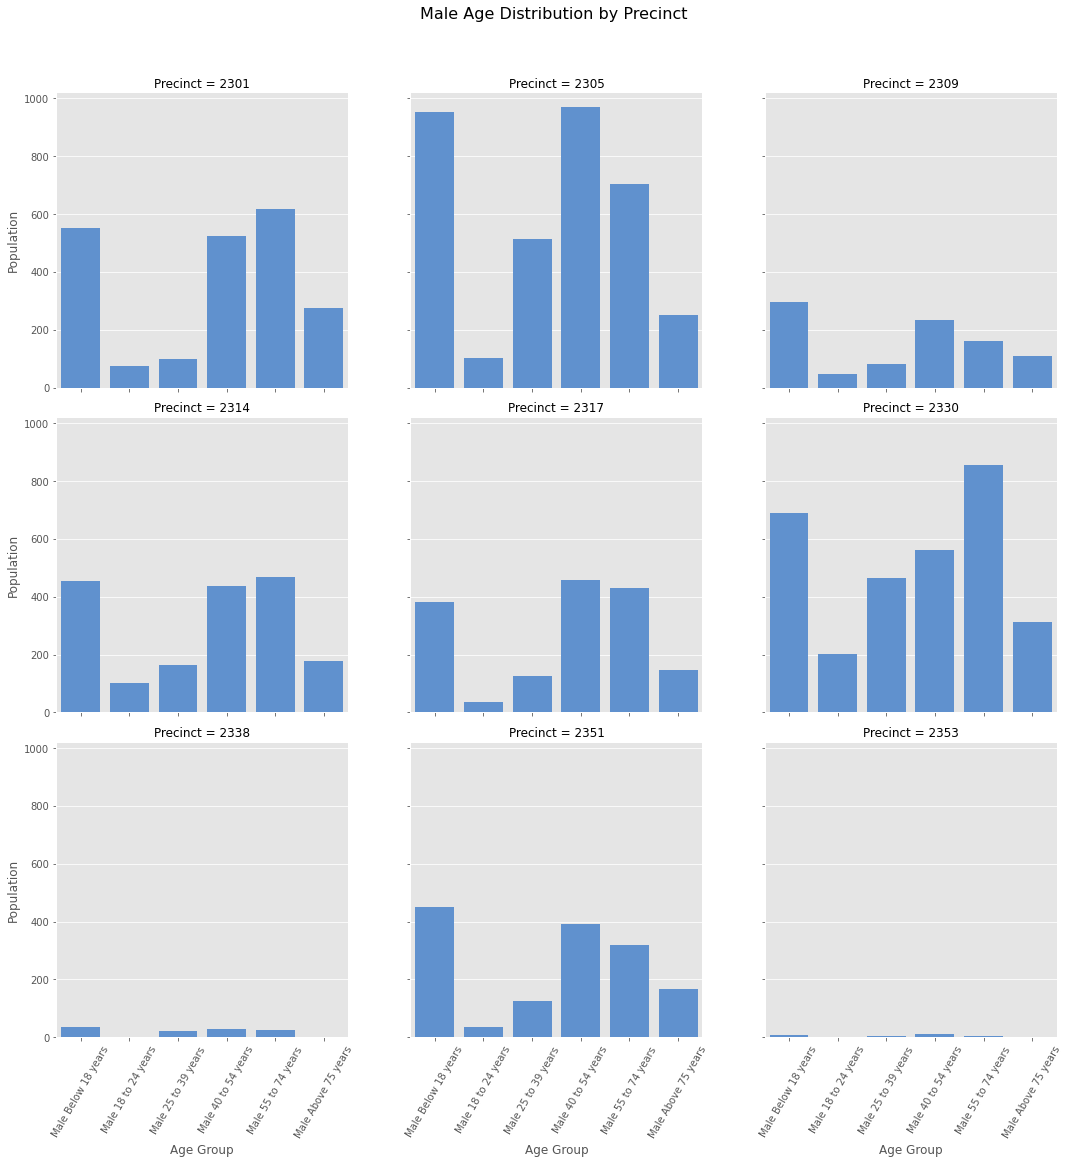

In [59]:
male_age_group_df = df[["Precinct", 'Male Below 18 years', 'Male 18 to 24 years', 'Male 25 to 39 years',
       'Male 40 to 54 years', 'Male 55 to 74 years', 'Male Above 75 years']]

reshape = pd.melt(male_age_group_df, id_vars = "Precinct", value_vars = ['Male Below 18 years', 'Male 18 to 24 years', 'Male 25 to 39 years',
       'Male 40 to 54 years', 'Male 55 to 74 years', 'Male Above 75 years'])
reshape.columns = ["Precinct", "Age Group", "Population"]
g = sns.catplot(kind="bar", col = "Precinct", x = "Age Group", y = "Population", data = reshape, 
                col_wrap = 3, color="#4E8FE0")
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Male Age Distribution by Precinct', fontsize=16);

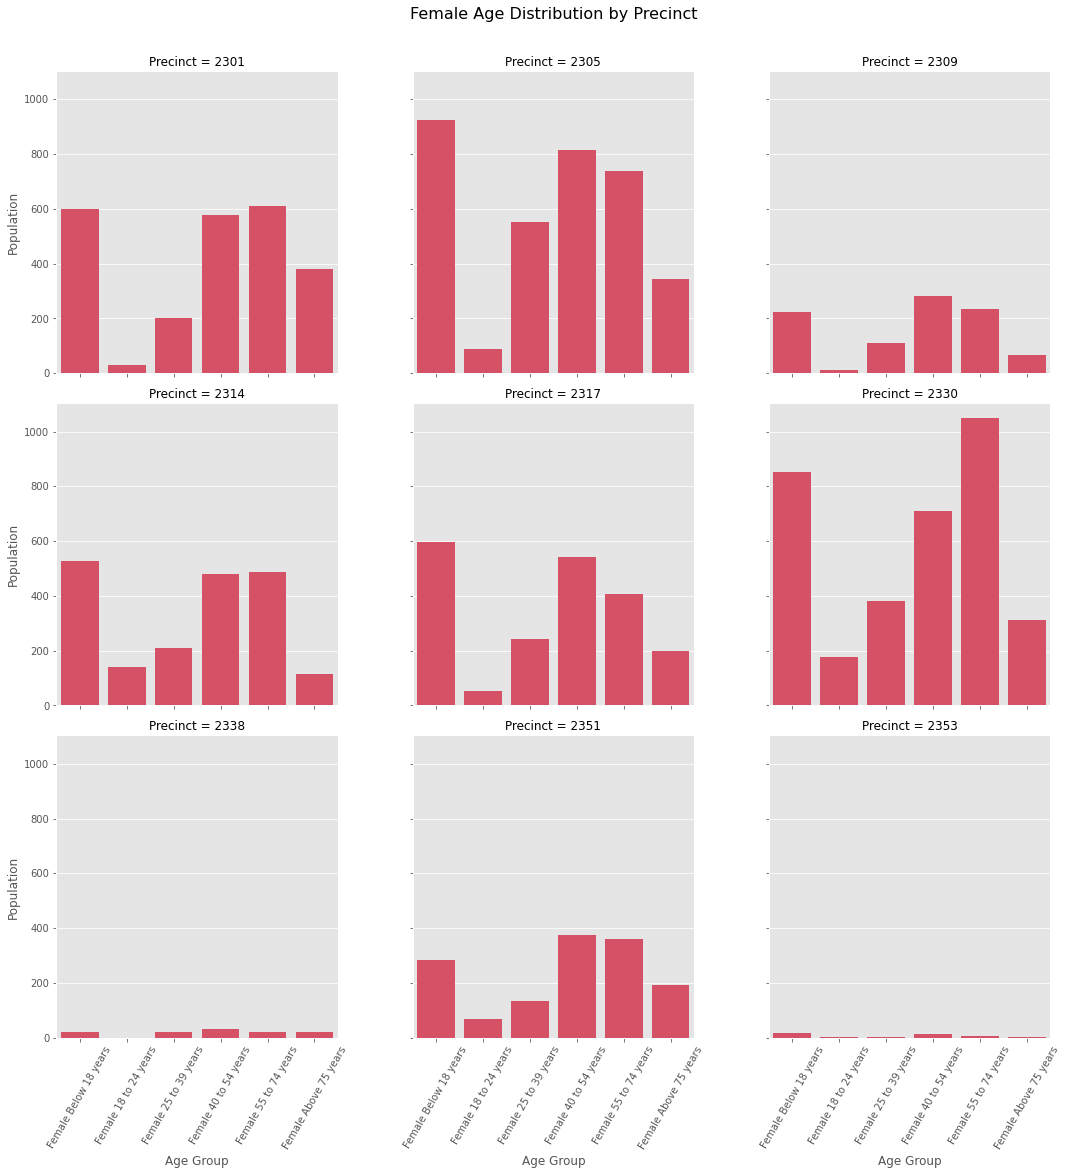

In [60]:
Female_age_group_df = df[["Precinct", 'Female Below 18 years', 'Female 18 to 24 years', 'Female 25 to 39 years',
       'Female 40 to 54 years', 'Female 55 to 74 years', 'Female Above 75 years']]

reshape = pd.melt(Female_age_group_df, id_vars = "Precinct", value_vars = ['Female Below 18 years', 'Female 18 to 24 years', 'Female 25 to 39 years',
       'Female 40 to 54 years', 'Female 55 to 74 years', 'Female Above 75 years'])
reshape.columns = ["Precinct", "Age Group", "Population"]
g = sns.catplot(kind="bar", col = "Precinct", x = "Age Group", y = "Population", data = reshape, 
                col_wrap = 3, color="#EB3B57")
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Female Age Distribution by Precinct', fontsize=16);

In [62]:
for i in ['Below 18 years', '18 to 24 years', '25 to 39 years',
       '40 to 54 years', '55 to 74 years', 'Above 75 years']:
    male_col = "Male " + i
    female_col = "Female " + i
    df["Total " + i] = df[male_col] + df[female_col]


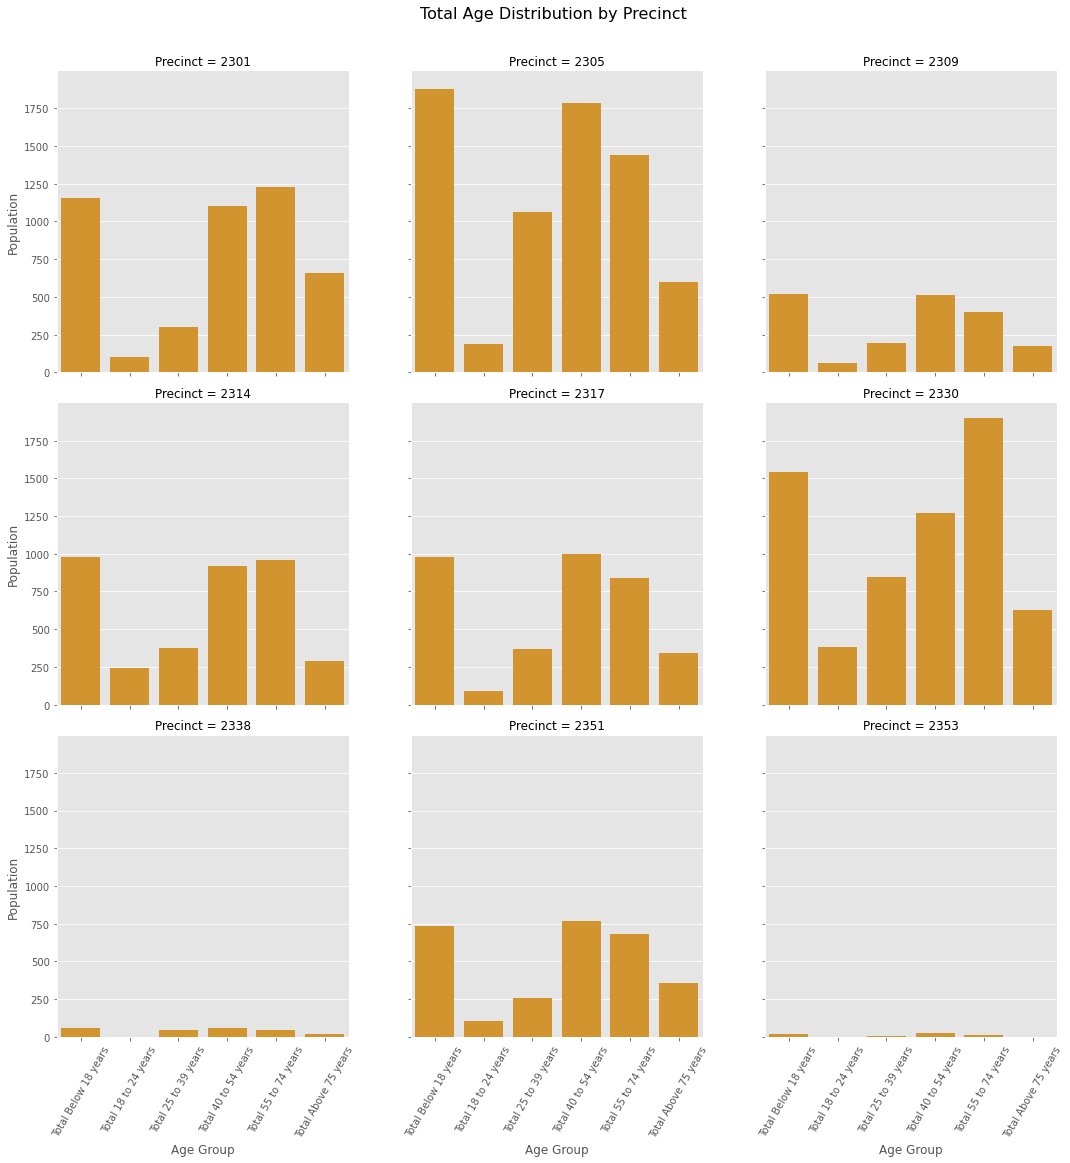

In [64]:
Total_age_group_df = df[["Precinct", 'Total Below 18 years', 'Total 18 to 24 years', 'Total 25 to 39 years',
       'Total 40 to 54 years', 'Total 55 to 74 years', 'Total Above 75 years']]

reshape = pd.melt(Total_age_group_df, id_vars = "Precinct", value_vars = ['Total Below 18 years', 'Total 18 to 24 years', 'Total 25 to 39 years',
       'Total 40 to 54 years', 'Total 55 to 74 years', 'Total Above 75 years'])
reshape.columns = ["Precinct", "Age Group", "Population"]
g = sns.catplot(kind="bar", col = "Precinct", x = "Age Group", y = "Population", data = reshape, 
                col_wrap = 3, color="#ED9A14")
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle('Total Age Distribution by Precinct', fontsize=16);

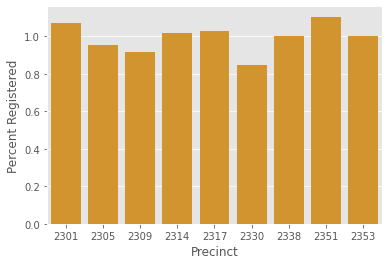

In [185]:
# Registered Voters/18+year old
df['Percent Registered'] = df['Registered Voters']/df['Above 18 years']
fig, ax=plt.subplots()
sns.barplot(x='Precinct', y='Percent Registered', data=df, color="#ED9A14");

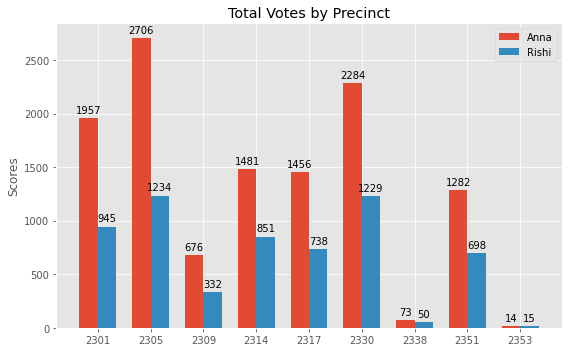

In [196]:
labels = list(df['Precinct'])
Anna = df['Total Votes_Anna']
Rishi = df['Total Votes_Rishi']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, Anna, width, label='Anna')
rects2 = ax.bar(x + width/2, Rishi, width, label='Rishi')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Votes')
ax.set_title('Total Votes by Precinct')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()

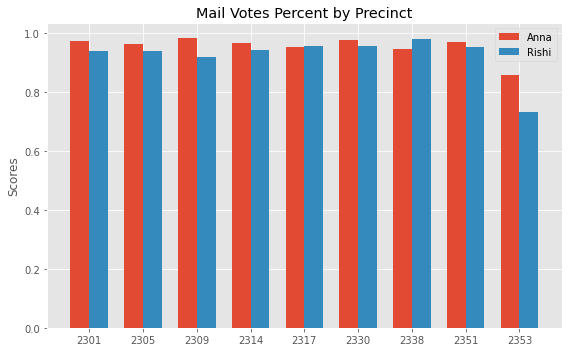

In [201]:
# Percent of Mail Votes
df['Mail Vote Percent_Anna'] = df['Vote By Mail_Anna']/df['Total Votes_Anna']
df['Mail Vote Percent_Rishi'] = df['Vote By Mail_Rishi']/df['Total Votes_Rishi']

labels = list(df['Precinct'])
Anna = df['Mail Vote Percent_Anna']
Rishi = df['Mail Vote Percent_Rishi']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, Anna, width, label='Anna')
rects2 = ax.bar(x + width/2, Rishi, width, label='Rishi')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mail Votes Percent')
ax.set_title('Mail Votes Percent by Precinct')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
fig.tight_layout()